In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./Ek_Tha_Titanic.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#PassengerId is not useful to us therefore we can remove it

In [7]:
data.drop('PassengerId', axis=1, inplace=True)

In [8]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#It can be seen that around 38% of people survived, therefore chaces of survival is less

<AxesSubplot:xlabel='Survived', ylabel='count'>

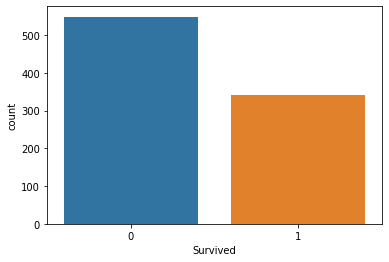

In [10]:
sns.countplot(data=data, x='Survived')

In [11]:
#looking at Pclass

In [12]:
data['Pclass'].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

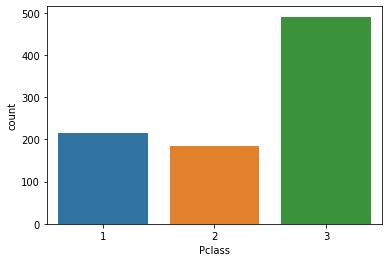

In [13]:
sns.countplot(data = data, x = 'Pclass')

<AxesSubplot:xlabel='Survived', ylabel='count'>

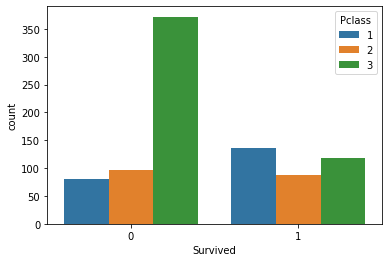

In [14]:
sns.countplot(data = data, x = 'Survived', hue = 'Pclass')

In [15]:
#chances of survival of class 3 people are less

In [16]:
data['Survived'].groupby(data['Pclass']).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [17]:
#chances of survival of class 1 people is very high

In [18]:
#Now coming to sex

<AxesSubplot:xlabel='Sex', ylabel='count'>

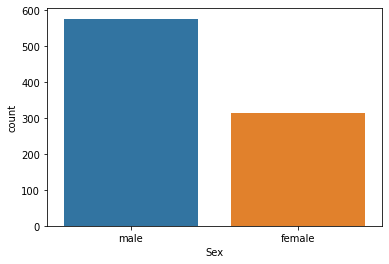

In [19]:
sns.countplot(data=data, x = 'Sex')

In [20]:
#More no. of males are present on board

In [21]:
data['Survived'].groupby(data['Sex']).mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [22]:
#chances of survival of female is very high

In [23]:
data['Survived'].groupby(data['SibSp']).mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [24]:
#survival chances are better when someone has 1 or 2 siblings and spouse

In [25]:
data['Survived'].groupby(data['Parch']).mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [26]:
#so Parch and SibSp can be combined into a new feature fam

In [27]:
data['Fam']=data['Parch']+data['SibSp']

In [28]:
data['Embarked'].isnull().sum()

2

<AxesSubplot:xlabel='Survived', ylabel='count'>

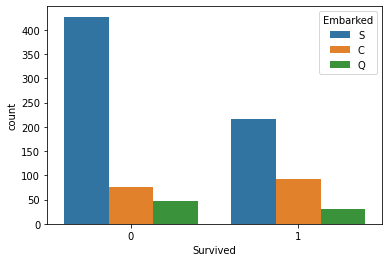

In [29]:
sns.countplot(data = data, x = 'Survived', hue='Embarked' )

In [30]:
data['Survived'].groupby(data['Embarked']).mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [31]:
#we can see that people biarding from chembourg has a high survival rate, when compared to others

In [32]:
data['Survived'].groupby(pd.qcut(data['Age'],5)).mean()

Age
(0.419, 19.0]    0.481707
(19.0, 25.0]     0.328467
(25.0, 31.8]     0.393701
(31.8, 41.0]     0.437500
(41.0, 80.0]     0.373239
Name: Survived, dtype: float64

In [33]:
#it seems like survival rate doesnt really matters with age

In [34]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fam
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [35]:
data.drop('Ticket', inplace = True, axis =1)

In [36]:
import re
data['Title'] = data.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

In [37]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Fam,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,1,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,1,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,0,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,1,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,0,Mr


<AxesSubplot:xlabel='Title', ylabel='count'>

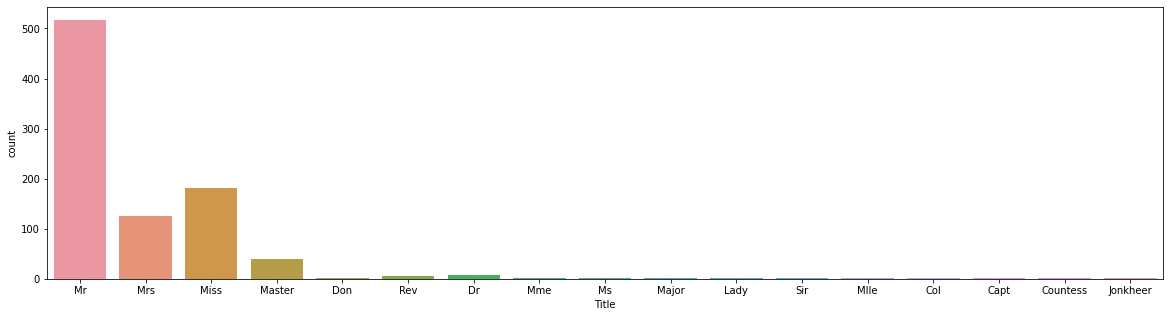

In [38]:
plt.figure(figsize=(20,5))
sns.countplot(data=data, x= 'Title')

In [39]:
data['Title'] = data['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
data['Title'] = data['Title'].replace(['Don', 'Dona', 'Rev', 
                                    'Dr', 'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'],'Special')

In [40]:
data['Title'].value_counts()

Mr         517
Miss       185
Mrs        126
Master      40
Special     23
Name: Title, dtype: int64

In [41]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
Fam           0
Title         0
dtype: int64

In [42]:
#Filling null value

In [43]:
data['Embarked']=data['Embarked'].fillna("S")

In [44]:
data['Age'].fillna(data['Age'].median(), axis = 0, inplace = True)

In [45]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
Fam           0
Title         0
dtype: int64

In [46]:
data['Cabin'].isnull().sum()/data.shape[0]

0.7710437710437711

In [47]:
#we can see around 77% percent of data is empty, so its better to drop off this column

In [48]:
data.drop(['Cabin','Name'], axis =1, inplace =True)

In [49]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fam,Title
0,0,3,male,22.0,1,0,7.2500,S,1,Mr
1,1,1,female,38.0,1,0,71.2833,C,1,Mrs
2,1,3,female,26.0,0,0,7.9250,S,0,Miss
3,1,1,female,35.0,1,0,53.1000,S,1,Mrs
4,0,3,male,35.0,0,0,8.0500,S,0,Mr
5,0,3,male,28.0,0,0,8.4583,Q,0,Mr
6,0,1,male,54.0,0,0,51.8625,S,0,Mr
7,0,3,male,2.0,3,1,21.0750,S,4,Master
8,1,3,female,27.0,0,2,11.1333,S,2,Mrs
9,1,2,female,14.0,1,0,30.0708,C,1,Mrs


In [50]:
data['Sex'] = data['Sex'].apply(lambda x: 1 if x=='male' else 0)

In [51]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fam,Title
0,0,3,1,22.0,1,0,7.2500,S,1,Mr
1,1,1,0,38.0,1,0,71.2833,C,1,Mrs
2,1,3,0,26.0,0,0,7.9250,S,0,Miss
3,1,1,0,35.0,1,0,53.1000,S,1,Mrs
4,0,3,1,35.0,0,0,8.0500,S,0,Mr


In [52]:
df = pd.get_dummies(data = data, columns=['Embarked','Title','Pclass'], drop_first=True)

In [53]:
df.head(10)

,Survived,Sex,Age,SibSp,Parch,Fare,Fam,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Special,Pclass_2,Pclass_3
0,0,1,22.0,1,0,7.2500,1,0,1,0,1,0,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0,0,0,1,0,0,0
2,1,0,26.0,0,0,7.9250,0,0,1,1,0,0,0,0,1
3,1,0,35.0,1,0,53.1000,1,0,1,0,0,1,0,0,0
4,0,1,35.0,0,0,8.0500,0,0,1,0,1,0,0,0,1
5,0,1,28.0,0,0,8.4583,0,1,0,0,1,0,0,0,1
6,0,1,54.0,0,0,51.8625,0,0,1,0,1,0,0,0,0
7,0,1,2.0,3,1,21.0750,4,0,1,0,0,0,0,0,1
8,1,0,27.0,0,2,11.1333,2,0,1,0,0,1,0,0,1
9,1,0,14.0,1,0,30.0708,1,0,0,0,0,1,0,1,0


In [54]:
X = df.iloc[:,1:]

In [55]:
X

,Sex,Age,SibSp,Parch,Fare,Fam,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Special,Pclass_2,Pclass_3
0,1,22.0,1,0,7.2500,1,0,1,0,1,0,0,0,1
1,0,38.0,1,0,71.2833,1,0,0,0,0,1,0,0,0
2,0,26.0,0,0,7.9250,0,0,1,1,0,0,0,0,1
3,0,35.0,1,0,53.1000,1,0,1,0,0,1,0,0,0
4,1,35.0,0,0,8.0500,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,27.0,0,0,13.0000,0,0,1,0,0,0,1,1,0
887,0,19.0,0,0,30.0000,0,0,1,1,0,0,0,0,0
888,0,28.0,1,2,23.4500,3,0,1,1,0,0,0,0,1
889,1,26.0,0,0,30.0000,0,0,0,0,1,0,0,0,0


In [56]:
y = df.iloc[:,0]

In [57]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [60]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 14), (179, 14), (712,), (179,))

In [61]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as acs

In [143]:
classifier = RandomForestClassifier(random_state = 0)
sfs = SequentialFeatureSelector(k_features=7, estimator=classifier, forward=True, floating=False, scoring='accuracy')
sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=RandomForestClassifier(random_state=0),
                          k_features=7, scoring='accuracy')

In [144]:
sfs.k_feature_names_

('Sex',
 'Fam',
 'Embarked_Q',
 'Embarked_S',
 'Title_Mr',
 'Title_Special',
 'Pclass_2')

In [145]:
fs_train = X_train[list(sfs.k_feature_names_)]
fs_test = X_test[list(sfs.k_feature_names_)]

In [146]:
modelfs = RandomForestClassifier(random_state = 0)
modelfs.fit(fs_train,y_train)

RandomForestClassifier(random_state=0)

In [147]:
fs_pred = modelfs.predict(fs_test)
acs(fs_pred, y_test)

0.8268156424581006

In [141]:
#using sequential backward elimination

In [131]:
sbs = SequentialFeatureSelector(k_features=11, estimator=classifier, forward=False, floating=False, scoring='accuracy')
sbs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=RandomForestClassifier(random_state=0),
                          forward=False, k_features=11, scoring='accuracy')

In [132]:
sbs.k_feature_names_

('Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked_Q',
 'Embarked_S',
 'Title_Mr',
 'Title_Special',
 'Pclass_2',
 'Pclass_3')

In [133]:
bs_train = X_train[list(sbs.k_feature_names_)]
bs_test = X_test[list(sbs.k_feature_names_)]

In [134]:
modelbs = RandomForestClassifier(random_state =0)
modelbs.fit(bs_train, y_train)

RandomForestClassifier(random_state=0)

In [135]:
bs_pred = modelbs.predict(bs_test)
acs(bs_pred, y_test)

0.8435754189944135

In [142]:
#using exhaustive feature selection

In [149]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
efs = ExhaustiveFeatureSelector(estimator=classifier, min_features=4, max_features=11, scoring='accuracy')
efs.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
efs.best_feature_names_

In [ ]:
efs_train = X_train[list(best_feature_names_)]
efs_test = X_test[list(best_feature_names_)]

In [ ]:
modelefs = RandomForestClassifier(random_state =0)
modelefs.fit(efs_train, y_train)

In [ ]:
efs_pred = modelefs.predict(efs_test)
acs(efs_pred, y_test)

In [150]:
#using all the features

In [151]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acs(y_pred, y_test)

0.8268156424581006